# First analysis (old)

## Data Import

Loading needed modules

Collecting all the available data from the MAF files

In [ ]:
import os
import pandas as pd
import numpy as np
import glob

all_maf_data = pd.read_csv('../data/maf_data.csv')

/var/folders/n3/gb4qgnr95d9bk6_y9qtj6p980000gq/T/ipykernel_88916/1532786360.py:6: DtypeWarning: Columns (114,120) have mixed types. Specify dtype option on import or set low_memory=False.
  all_maf_data = pd.read_csv('../data/maf_data.csv')


Select important columns

In [ ]:
# columns = []
# for i in all_maf_data.keys():
#     columns.append(i)
# for col in range(0, len(columns), 4):
#     print(columns[col:col+4])

['Unnamed: 0', 'Hugo_Symbol', 'Entrez_Gene_Id', 'Center']
['NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position']
['Strand', 'Variant_Classification', 'Variant_Type', 'Reference_Allele']
['Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS', 'Tumor_Sample_Barcode']
['Matched_Norm_Sample_Barcode', 'Mutation_Status', 'Tumor_Sample_UUID', 'Matched_Norm_Sample_UUID']
['HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID']
['Exon_Number', 't_depth', 't_ref_count', 't_alt_count']
['n_depth', 'all_effects', 'Allele', 'Gene']
['Feature', 'Feature_type', 'One_Consequence', 'Consequence']
['cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids']
['Codons', 'Existing_variation', 'DISTANCE', 'TRANSCRIPT_STRAND']
['SYMBOL', 'SYMBOL_SOURCE', 'HGNC_ID', 'BIOTYPE']
['CANONICAL', 'CCDS', 'ENSP', 'SWISSPROT']
['TREMBL', 'UNIPARC', 'UNIPROT_ISOFORM', 'RefSeq']
['MANE', 'APPRIS', 'FLAGS', 'SIFT']
['PolyPhen', 'EXON', 'INTRON', 'DOMAINS']
['1000G_AF', '1000G_AFR_AF', '1000G_AMR_AF', '1000G_EAS

Drop empty columns

In [ ]:
all_maf_data.dropna(how='all', axis=1, inplace=True)

## Data preview

In [ ]:
all_maf_data.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,GENE_PHENO,CONTEXT,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,hotspot,RNA_Support,callers
0,GLMN,11146,BCM,GRCh38,chr1,92246555,92246555,+,Missense_Mutation,SNP,...,1.0,CTTCAGAGGTA,fc5d7820-98c5-4bc6-95a4-368771f37e3c,9fe2d633-1cc8-471d-a15f-7dacd765ec0a,edc62c30-cacc-457d-96ba-d05ed35432a3,NaN,NaN,N,Unknown,muse;mutect2;varscan2
1,H3-3A,3020,BCM,GRCh38,chr1,226064454,226064454,+,Missense_Mutation,SNP,...,1.0,CTGGAGGGGTG,fc5d7820-98c5-4bc6-95a4-368771f37e3c,9fe2d633-1cc8-471d-a15f-7dacd765ec0a,edc62c30-cacc-457d-96ba-d05ed35432a3,NaN,NaN,Y,Unknown,muse;mutect2;varscan2
2,HADHB,3032,BCM,GRCh38,chr2,26279162,26279162,+,Missense_Mutation,SNP,...,1.0,CCACCAGTGAG,fc5d7820-98c5-4bc6-95a4-368771f37e3c,9fe2d633-1cc8-471d-a15f-7dacd765ec0a,edc62c30-cacc-457d-96ba-d05ed35432a3,NaN,NaN,N,Unknown,muse;mutect2;varscan2
3,EHD3,30845,BCM,GRCh38,chr2,31266476,31266476,+,Silent,SNP,...,NaN,GATGGCAAGAT,fc5d7820-98c5-4bc6-95a4-368771f37e3c,9fe2d633-1cc8-471d-a15f-7dacd765ec0a,edc62c30-cacc-457d-96ba-d05ed35432a3,NaN,NaN,N,Unknown,muse;mutect2;varscan2
4,VWA3B,200403,BCM,GRCh38,chr2,98303765,98303765,+,Missense_Mutation,SNP,...,1.0,GCTCTCATATA,fc5d7820-98c5-4bc6-95a4-368771f37e3c,9fe2d633-1cc8-471d-a15f-7dacd765ec0a,edc62c30-cacc-457d-96ba-d05ed35432a3,NaN,NaN,N,Unknown,muse;mutect2;varscan2


## Analysis

### Most Mutated Genes

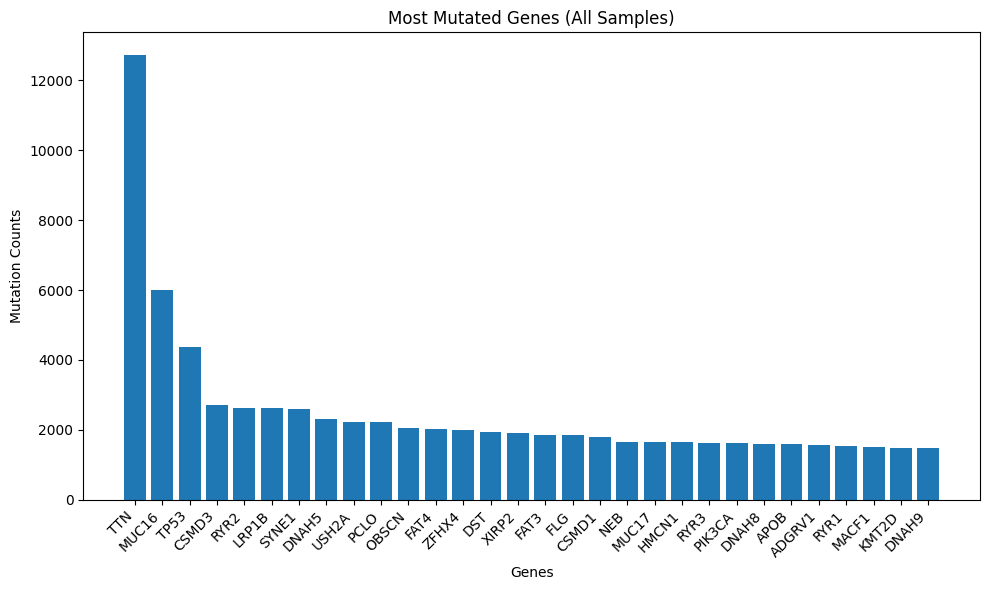

In [ ]:
import matplotlib.pyplot as plt
# Calculate the count of mutations per gene
mutation_counts = all_maf_data['Hugo_Symbol'].value_counts()
# Sort genes based on mutation counts in descending order
sorted_mutation_counts = mutation_counts.sort_values(ascending=False)
sorted_mutation_counts = sorted_mutation_counts[:30]

# Plot the most mutated genes using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_mutation_counts.index, sorted_mutation_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genes')
plt.ylabel('Mutation Counts')
plt.title('Most Mutated Genes (All Samples)')
plt.tight_layout()
plt.show()

### Mutation Types & Variant Classification

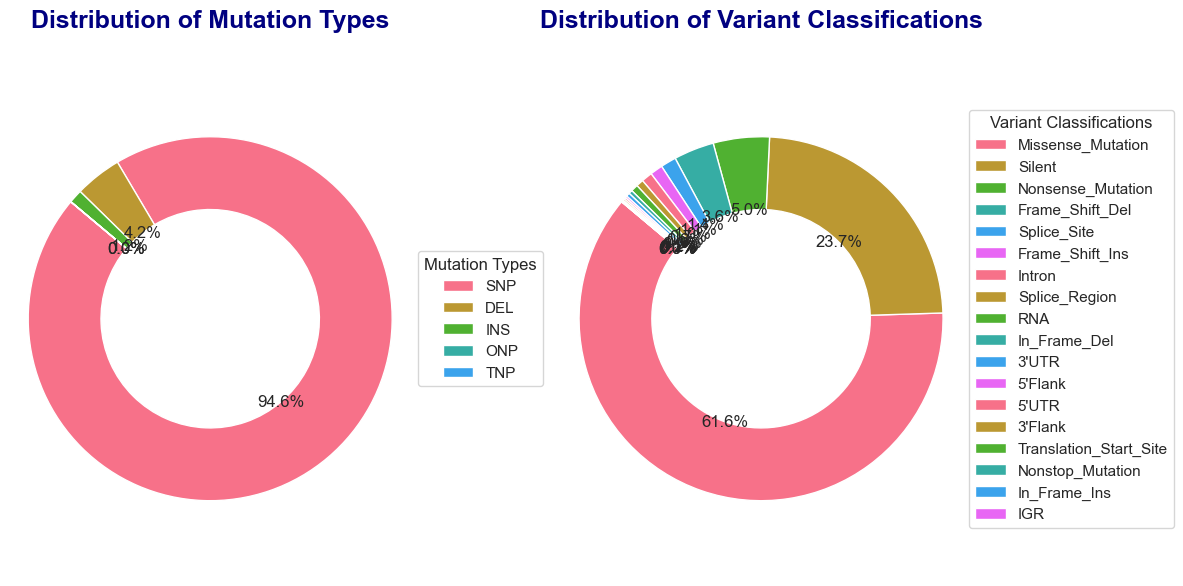

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice Seaborn style and color palette
sns.set(style='whitegrid')
colors = sns.color_palette("husl")

# Calculate the distribution of mutation types
mutation_types_counts = all_maf_data['Variant_Type'].value_counts()

# Calculate the distribution of variant classifications
variant_class_counts = all_maf_data['Variant_Classification'].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of mutation types using a pie chart
axes[0].pie(mutation_types_counts, labels=None, autopct='%1.1f%%',
            startangle=140, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
axes[0].axis('equal')
axes[0].legend(labels=mutation_types_counts.index, title='Mutation Types', bbox_to_anchor=(1, 0.5), loc='center left')
axes[0].set_title('Distribution of Mutation Types', y=1.05, fontdict={'fontsize': 18}, fontweight='bold', color='navy')
axes[0].set_aspect('equal')  # Ensure equal aspect ratio

# Plot the distribution of variant classifications using a pie chart
axes[1].pie(variant_class_counts, labels=None, autopct='%1.1f%%',
            startangle=140, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
axes[1].axis('equal')
axes[1].legend(labels=variant_class_counts.index, title='Variant Classifications', bbox_to_anchor=(1, 0.5), loc='center left')
axes[1].set_title('Distribution of Variant Classifications', y=1.05, fontdict={'fontsize': 18}, fontweight='bold', color='navy')
axes[1].set_aspect('equal')  # Ensure equal aspect ratio

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


##### Without SNP and Missense Mutations

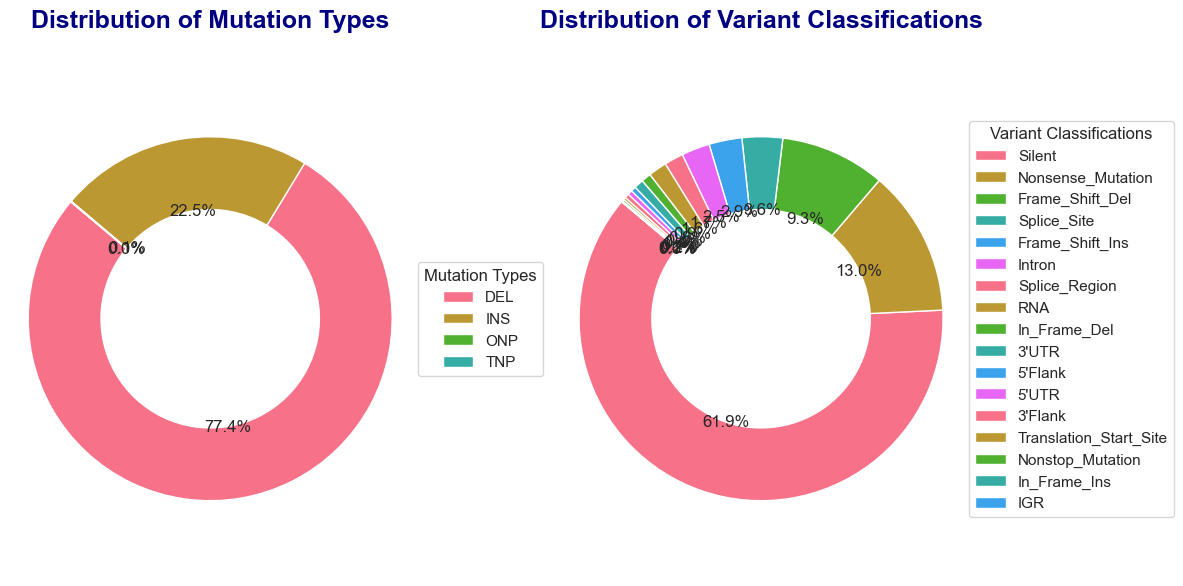

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice Seaborn style and color palette
sns.set(style='whitegrid')
colors = sns.color_palette("husl")

# Calculate the distribution of mutation types
mutation_types_counts = all_maf_data['Variant_Type'].value_counts()[1:]

# Calculate the distribution of variant classifications
variant_class_counts = all_maf_data['Variant_Classification'].value_counts()[1:]
variant_class_counts = variant_class_counts

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of mutation types using a pie chart
axes[0].pie(mutation_types_counts, labels=None, autopct='%1.1f%%',
            startangle=140, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
axes[0].axis('equal')
axes[0].legend(labels=mutation_types_counts.index, title='Mutation Types', bbox_to_anchor=(1, 0.5), loc='center left')
axes[0].set_title('Distribution of Mutation Types', y=1.05, fontdict={'fontsize': 18}, fontweight='bold', color='navy')
axes[0].set_aspect('equal')  # Ensure equal aspect ratio


# Plot the distribution of variant classifications using a pie chart
axes[1].pie(variant_class_counts, labels=None, autopct='%1.1f%%',
            startangle=140, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
axes[1].axis('equal')
axes[1].legend(labels=variant_class_counts.index, title='Variant Classifications', bbox_to_anchor=(1, 0.5), loc='center left')
axes[1].set_title('Distribution of Variant Classifications', y=1.05, fontdict={'fontsize': 18}, fontweight='bold', color='navy')
axes[1].set_aspect('equal')  # Ensure equal aspect ratio

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


#### Descriptive: Mutation Types & Variant Classification

In [ ]:
snv_levels = set(all_maf_data['Variant_Type'])
print('Factor levels for SNVs:', snv_levels)
print('Total:')
for i in snv_levels:
    print('Number of {}s:'.format(i), len(all_maf_data.loc[all_maf_data['Variant_Type'] == i]), '({}%)'.format(round(len(all_maf_data.loc[all_maf_data['Variant_Type'] == i])/len(all_maf_data)*100,4)))
print('-'*70)
vc_levels = set(all_maf_data['Variant_Classification'])
print('Factor levels for SNVs:', vc_levels)
print('Total:')
for i in vc_levels:
    print('Number of {}s:'.format(i), len(all_maf_data.loc[all_maf_data['Variant_Classification'] == '{}'.format(i)]), '({}%)'.format(round(len(all_maf_data.loc[all_maf_data['Variant_Classification'] == i])/len(all_maf_data)*100,0)))
print('-'*70)


Factor levels for SNVs: {'TNP', 'INS', 'DEL', 'SNP', 'ONP'}
Total:
Number of TNPs: 15 (0.0006%)
Number of INSs: 31100 (1.2101%)
Number of DELs: 106942 (4.161%)
Number of SNPs: 2431963 (94.6256%)
Number of ONPs: 70 (0.0027%)
----------------------------------------------------------------------
Factor levels for SNVs: {"3'Flank", 'In_Frame_Ins', 'IGR', 'Translation_Start_Site', "3'UTR", 'RNA', 'Frame_Shift_Del', 'Silent', 'Nonstop_Mutation', 'Splice_Site', "5'UTR", 'Intron', "5'Flank", 'Nonsense_Mutation', 'Frame_Shift_Ins', 'Missense_Mutation', 'In_Frame_Del', 'Splice_Region'}
Total:
Number of 3'Flanks: 3792 (0.0%)
Number of In_Frame_Inss: 807 (0.0%)
Number of IGRs: 38 (0.0%)
Number of Translation_Start_Sites: 2161 (0.0%)
Number of 3'UTRs: 8275 (0.0%)
Number of RNAs: 16200 (1.0%)
Number of Frame_Shift_Dels: 92092 (4.0%)
Number of Silents: 610315 (24.0%)
Number of Nonstop_Mutations: 1718 (0.0%)
Number of Splice_Sites: 35539 (1.0%)
Number of 5'UTRs: 4129 (0.0%)
Number of Introns: 24814 (

### Progenetix Data: Biosamples

In [ ]:
# Connect to MongoDB
from pymongo import MongoClient
from bycon import *

client = MongoClient()
db = client.progenetix
bs = db.biosamples
ind = db.individuals
var = db.variants

In [ ]:
# Get the biosample information for each biosample ID
bs_info = {}
wanted_info = ['histological_diagnosis', 'pathological_stage', 'icdo_morphology', 'icdo_topography', 'biosample_status',
               'followup_state', 'notes', 'sample_origin_detail', 'individual_id']
for info in wanted_info:
    bs_info[info] = []
bs_info['biosample_id'] = []

biosamples = var.distinct('biosample_id', {'variant_state.label': 'sequence_alteration'})
for ids in biosamples:
    hit = bs.find({'id': ids})
    bs_info['biosample_id'].append(ids)
    for entry in hit:
        for i in wanted_info:
            bs_info[i].append(entry[i])

In [ ]:
# Create a dataframe from the dictionary
bs_df = pd.DataFrame.from_dict(bs_info)
for key in bs_df.keys():
    if key in ['notes', 'individual_id', 'biosample_id']:
        continue
    else:
        bs_df[key + '_id'] = '' * len(bs_df)
        bs_df[key + '_label'] = '' * len(bs_df)
        for i in range(len(bs_df)):
            bs_df[key + '_id'][i] = bs_df[key][i].get('id')
            bs_df[key + '_label'][i] = bs_df[key][i].get('label')
        bs_df = bs_df.drop(key, axis=1)

In [ ]:
bs_df.head()
#bs_df.to_csv('data/analysis_df.csv')

,notes,individual_id,biosample_id,histological_diagnosis_id,histological_diagnosis_label,pathological_stage_id,pathological_stage_label,icdo_morphology_id,icdo_morphology_label,icdo_topography_id,icdo_topography_label,biosample_status_id,biosample_status_label,followup_state_id,followup_state_label,sample_origin_detail_id,sample_origin_detail_label
0,Primary Blood Derived Cancer - Peripheral Blood,pgxind-kftx3f6u,pgxbs-kftvhhhj,NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,NCIT:C92207,Stage Unknown,pgx:icdom-98613,"Acute myeloid leukemia, NOS",pgx:icdot-C42.1,Bone marrow,EFO:0009656,neoplastic sample,EFO:0030041,dead (follow-up status),UBERON:0002371,bone marrow
1,Primary Tumor,pgxind-kftx3f6y,pgxbs-kftvhhhm,NCIT:C3903,Mixed Glioma,NCIT:C92207,Stage Unknown,pgx:icdom-93823,Mixed glioma,pgx:icdot-C71.0,Cerebrum,EFO:0009656,neoplastic sample,EFO:0030049,alive (follow-up status),UBERON:0001869,cerebral hemisphere
2,Primary Tumor,pgxind-kftx3f72,pgxbs-kftvhhhp,NCIT:C4220,Malignant Adrenal Gland Pheochromocytoma,NCIT:C92207,Stage Unknown,pgx:icdom-87003,"Pheochromocytoma, malignant",pgx:icdot-C74.9,"Adrenal gland, NOS",EFO:0009656,neoplastic sample,EFO:0030049,alive (follow-up status),UBERON:0002369,adrenal gland
3,Primary Tumor,pgxind-kftx3f74,pgxbs-kftvhhhr,NCIT:C4349,Colon Adenocarcinoma,NCIT:C27967,Stage IIA,pgx:icdom-81403,"Adenocarcinoma, NOS",pgx:icdot-C18.2,Ascending colon,EFO:0009656,neoplastic sample,EFO:0030049,alive (follow-up status),UBERON:0001156,ascending colon
4,Primary Tumor,pgxind-kftx3f78,pgxbs-kftvhhhu,NCIT:C3493,Squamous Cell Lung Carcinoma,NCIT:C27976,Stage IB,pgx:icdom-80703,"Squamous cell carcinoma, NOS",pgx:icdot-C34.1,"Upper lobe, lung",EFO:0009656,neoplastic sample,EFO:0030049,alive (follow-up status),UBERON:0008948,upper lobe of lung


#### Descriptive

In [ ]:
print('Histological Diagnosis:\n', '_' * 70, '\n\n', bs_df.histological_diagnosis_label.value_counts(), '\n\n',
      'Pathological stage:\n', '_' * 70, '\n\n', bs_df.pathological_stage_label.value_counts(),    '\n\n'
        'ICDO Morphology:\n', '_' * 70, '\n\n', bs_df.icdo_morphology_label.value_counts(),    '\n\n'
        'ICDO Topography:\n', '_' * 70, '\n\n', bs_df.icdo_topography_label.value_counts(),    '\n\n'
        'Biosample:\n', '_' * 70, '\n\n', bs_df.biosample_status_label.value_counts(), '\n\n'
        'Followup state:\n', '_' * 70, '\n\n', bs_df.followup_state_label.value_counts(),  '\n\n'
        'Sample Origin:\n', '_' * 70, '\n\n', bs_df.sample_origin_detail_label.value_counts())


Histological Diagnosis:
 ______________________________________________________________________ 

 Ductal Breast Carcinoma                         744
Clear Cell Renal Cell Carcinoma                 661
Unspecified Tissue                              573
Glioblastoma                                    557
Myeloproliferative Neoplasm                     524
                                               ... 
Melanoma                                          1
Floor of Mouth Adenoid Cystic Carcinoma           1
Hard Palate Adenoid Cystic Carcinoma              1
Submandibular Gland Adenoid Cystic Carcinoma      1
Soft Tissue Sarcoma                               1
Name: histological_diagnosis_label, Length: 235, dtype: int64 

 Pathological stage:
 ______________________________________________________________________ 

 Stage Unknown    6699
Stage I          1138
Stage IIA         745
Stage IIB         663
Stage III         632
Stage II          603
Stage IIIA        479
Stage IV       

#### Graphical

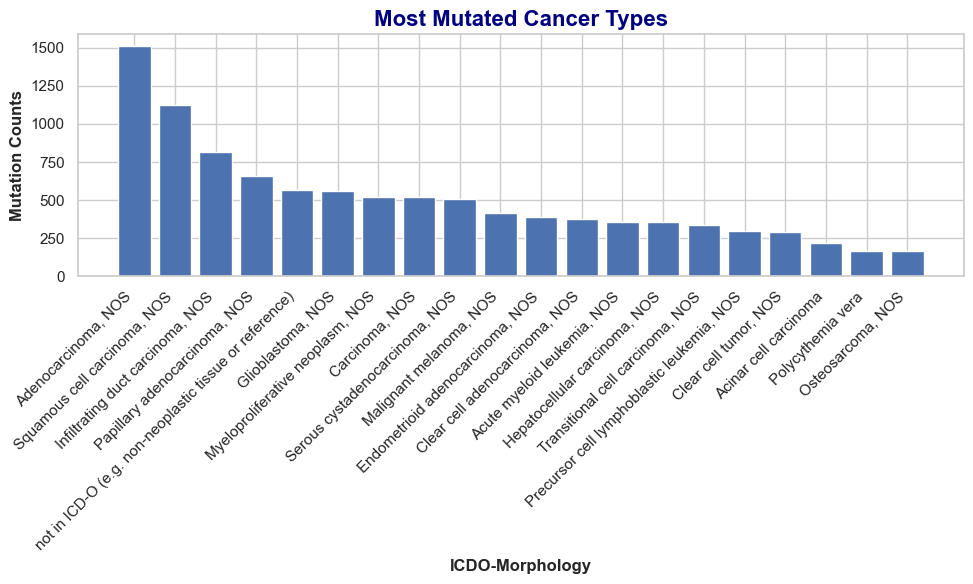

In [ ]:
morph_counts = bs_df['icdo_morphology_label'].value_counts()
# Sort genes based on mutation counts in descending order
sorted_morph_counts = morph_counts.sort_values(ascending=False)
sorted_morph_counts = sorted_morph_counts[:20]

# Plot the most mutated genes using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_morph_counts.index, sorted_morph_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('ICDO-Morphology', fontweight='bold')
plt.ylabel('Mutation Counts', fontweight='bold')
plt.title('Most Mutated Cancer Types', fontweight='bold', fontsize=16, color='navy')
plt.tight_layout()
plt.show()


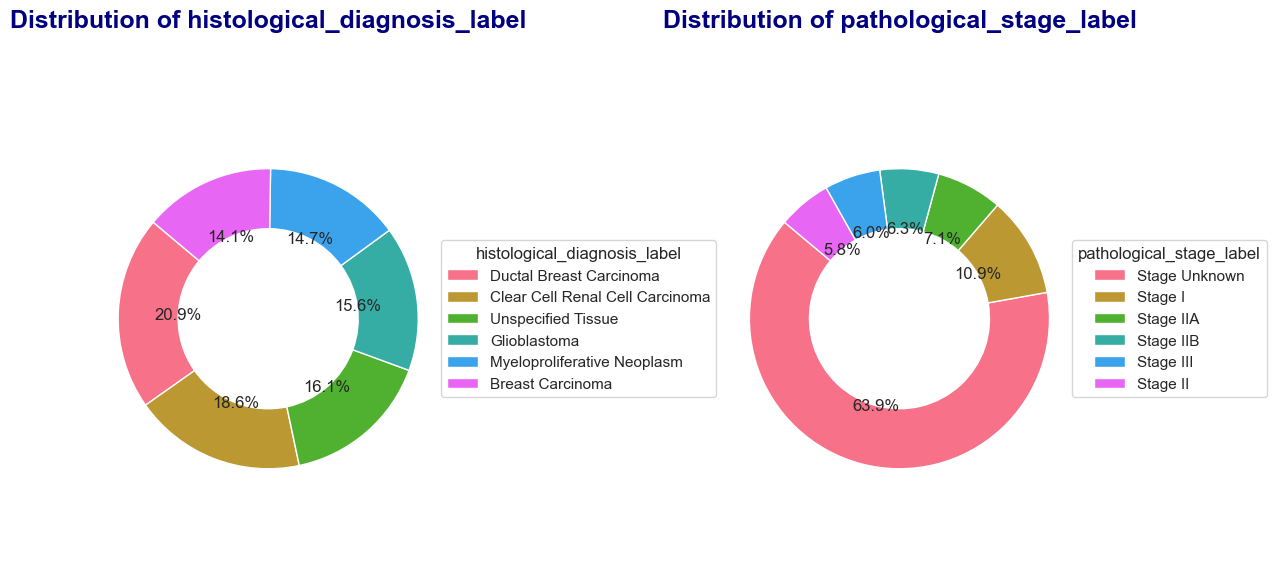

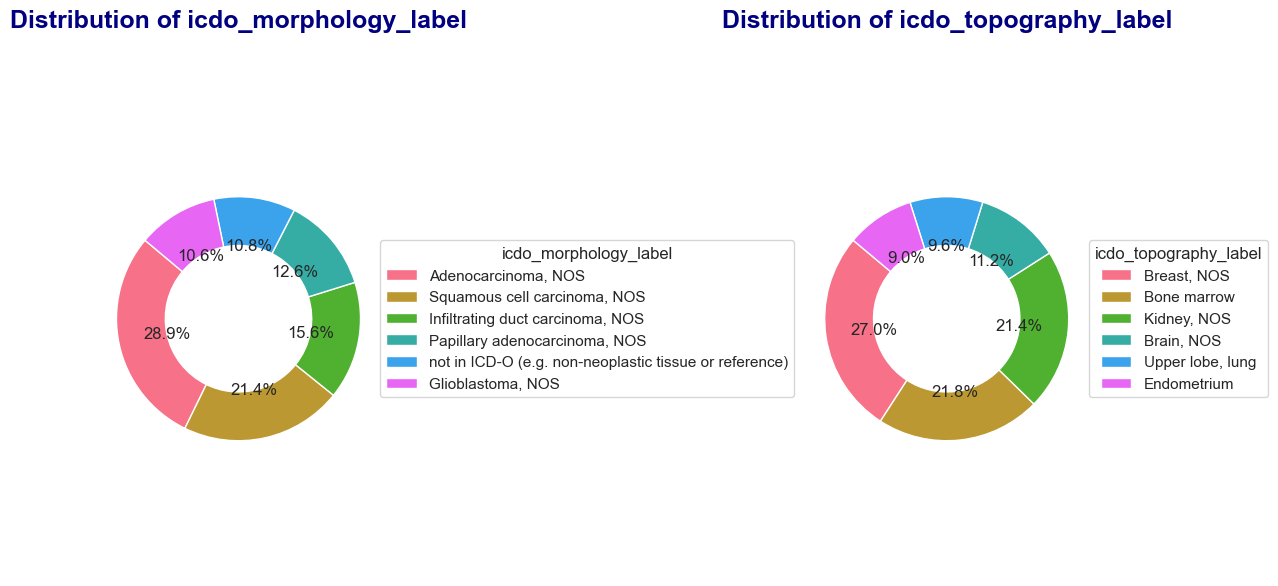

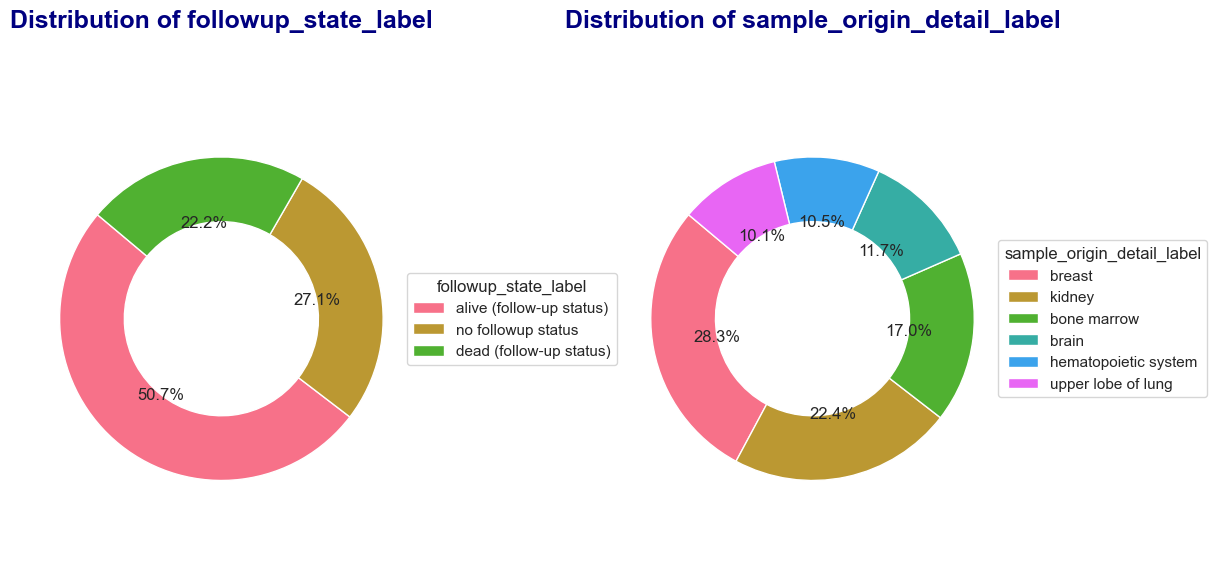

In [ ]:
# Set a nice Seaborn style and color palette
sns.set(style='whitegrid')
colors = sns.color_palette("husl")

diagnosis = bs_df.histological_diagnosis_label.value_counts()[0:6]
stage = bs_df.pathological_stage_label.value_counts()[0:6]
icdom = bs_df.icdo_morphology_label.value_counts()[0:6]
idot = bs_df.icdo_topography_label.value_counts()[0:6]
followup = bs_df.followup_state_label.value_counts()[0:6]
origin = bs_df.sample_origin_detail_label.value_counts()[0:6]

plot_list = [diagnosis, stage, icdom, idot, followup, origin]

for i in range(0, len(plot_list), 2):
    # Create subplots for the pie charts
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the distribution of mutation types using a pie chart
    axes[0].pie(plot_list[i], labels=None, autopct='%1.1f%%',
                startangle=140, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
    axes[0].axis('equal')
    axes[0].legend(labels=plot_list[i].index, title=f'{plot_list[i].name}', bbox_to_anchor=(1, 0.5), loc='center left')
    axes[0].set_title(f'Distribution of {plot_list[i].name}', y=1.05, fontdict={'fontsize': 18}, fontweight='bold', color='navy')
    axes[0].set_aspect('equal')  # Ensure equal aspect ratio

    # Plot the distribution of variant classifications using a pie chart
    axes[1].pie(plot_list[i+1], labels=None, autopct='%1.1f%%',
                startangle=140, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
    axes[1].axis('equal')
    axes[1].legend(labels=plot_list[i+1].index, title=f'{plot_list[i+1].name}', bbox_to_anchor=(1, 0.5), loc='center left')
    axes[1].set_title(f'Distribution of {plot_list[i+1].name}', y=1.05, fontdict={'fontsize': 18}, fontweight='bold', color='navy')
    axes[1].set_aspect('equal')  # Ensure equal aspect ratio

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()


### Progenetix Data: Individuals

#### Descriptive

In [ ]:
# Get data from individuals collection
wanted_info = ['info', 'sex', 'index_disease']
map_dict = {info: [] for info in wanted_info}
print(map_dict["index_disease"])

[]


In [ ]:
# need id for mapping???

# Get data from individuals collection
wanted_info = ['info', 'sex', 'index_disease']
map_dict = {info: [] for info in wanted_info}

individual_ids = bs_df.individual_id.unique()

for ids in individual_ids:
    hit = ind.find({'id': ids})
    for entry in hit:
        for i in wanted_info:
            if i in entry.keys():
                map_dict[i].append(entry[i])

# Create a dataframe from the dictionary
ind_inf = {}
for k in map_dict.keys():
    for entry in map_dict[k]:
        for value in entry:
            if value in ind_inf.keys():
                ind_inf[value].append(entry[value])
            else:
                ind_inf[value] = []
                ind_inf[value].append(entry[value])

# Remove the clinical_tnm_finding key (empty)
if 'clinical_tnm_finding' in ind_inf.keys():
    ind_inf.pop('clinical_tnm_finding')

# Create a dictionary with the counts of each value
counts = {}
for key in ind_inf.keys():
    if type(ind_inf[key][0]) is dict:
        # Get age and days for onset
        if key == 'onset':
            counts[key + '_age'] = {}
            counts[key + '_age_days'] = {}
            for j in ind_inf[key]:
                age = j.get('age')
                days = j.get('age_days')
                # Set an age counter
                if age not in counts[key + '_age']:
                    counts[key + '_age'].update({age: 1})
                else:
                    count = counts[key +'_age'].get(age)
                    counts[key +'_age'].update({age: count + 1})
                # Set a day counter
                if days not in counts[key + '_age_days']:
                    counts[key + '_age_days'].update({days: 1})
                else:
                    count = counts[key+'_age_days'].get(days)
                    counts[key +'_age_days'].update({days: count + 1})
        else:
            counts[key + '_id'] = {}
            counts[key + '_label'] = {}
            for j in ind_inf[key]:
                ids = j.get('id')
                labels = j.get('label')
                if ids not in counts[key + '_id']:
                    counts[key + '_id'].update({ids: 1})
                else:
                    count = counts[key+'_id'].get(ids)
                    counts[key +'_id'].update({ids: count + 1})
                if labels not in counts[key + '_label']:
                    counts[key + '_label'].update({labels: 1})
                else:
                    count = counts[key+'_label'].get(labels)
                    counts[key +'_label'].update({labels: count + 1})
    else:
        if key == 'legacy_ids':
            continue
        if key not in counts.keys():
            counts[key] = {}
        for k in ind_inf[key]:
            if k not in counts[key]:
                counts[key].update({k: 1})
            else:
                count = counts[key].get(k)
                counts[key].update({k: count + 1})

# Levels in the counts dictionary
print("Levels in:")
for key in counts.keys():
    # print(key, ':', counts[key])
    print(f"{key}", len(counts[key]))

print(' '*10)

# Summary for interesting keys
interests = ['ethnicity', 'death', 'race', 'label', 'followup_state_id',]
for i in counts.keys():
    if i in interests:
        print(f'---{i} ({len(counts[i])})---')
        for value in counts[i]:
            print(value, counts[i][value])
        print(' '*10)

Levels in:
year_of_birth 91
age_at_diagnosis 7574
death 3
ethnicity 3
race 6
days_to_death 1535
provenance 1
id 3
label 3
disease_code_id 222
disease_code_label 234
stage_id 17
stage_label 17
followup_state_id 3
followup_state_label 3
followup_time 224
onset_age 7898
onset_age_days 7730
          
---death (3)---
dead 2999
alive 6889
not reported 2
          
---ethnicity (3)---
not hispanic or latino 7239
not reported 2324
hispanic or latino 327
          
---race (6)---
white 7160
not reported 1205
asian 640
black or african american 851
native hawaiian or other pacific islander 9
american indian or alaska native 25
          
---label (3)---
male genotypic sex 5835
female genotypic sex 6316
genotypic sex 1436
          
---followup_state_id (3)---
EFO:0030041 3005
EFO:0030049 6875
EFO:0030039 3142
          


In [ ]:
for i in counts.keys():
    print(i, counts[i])

year_of_birth {1943: 231, 1975: 51, 1990: 10, 1940: 263, 1941: 235, 1962: 159, 1947: 292, None: 160, 1946: 245, 1924: 67, 1965: 114, 1963: 136, 1948: 257, 1971: 75, 1961: 155, 1928: 129, 1932: 140, 1956: 178, 1949: 262, 1945: 236, 1955: 223, 1982: 40, 1958: 216, 1939: 231, 1927: 93, 1951: 251, 1964: 133, 1957: 228, 1950: 283, 1978: 57, 1981: 37, 1983: 30, 1986: 35, 1933: 143, 1937: 202, 1968: 93, 1934: 189, 1952: 242, 1966: 104, 1926: 93, 1942: 263, 1959: 193, 1967: 105, 1953: 267, 1944: 246, 1931: 138, 1925: 79, 1954: 228, 1980: 44, 1960: 151, 1938: 227, 1929: 127, 1993: 5, 1989: 11, 1930: 140, 1936: 221, 1977: 54, 1985: 26, 1973: 70, 1969: 98, 1972: 89, 1979: 62, 1992: 9, 1935: 187, 1921: 39, 1923: 51, 1970: 87, 1976: 53, 1974: 51, 1984: 29, 1988: 21, 1915: 7, 1996: 2, 1919: 17, 1908: 2, 1918: 17, 1922: 38, 1914: 8, 1987: 25, 1920: 32, 1991: 14, 1917: 11, 1912: 6, 1916: 12, 1911: 1, 1913: 3, 1910: 1, 1902: 1, 1995: 1, 1909: 2, 1997: 1}
age_at_diagnosis {23833.0: 4, 14082.0: 2, 7834.0

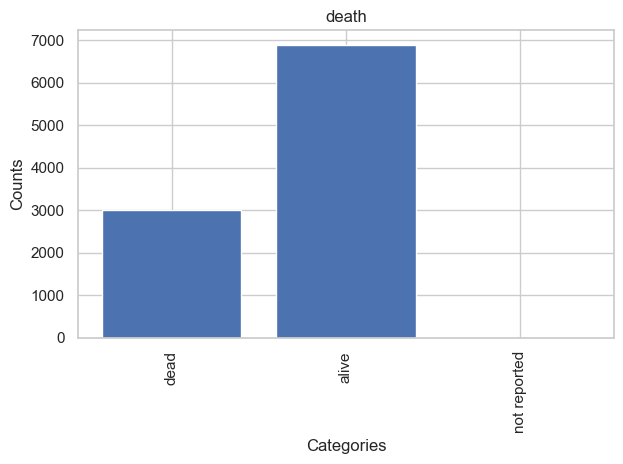

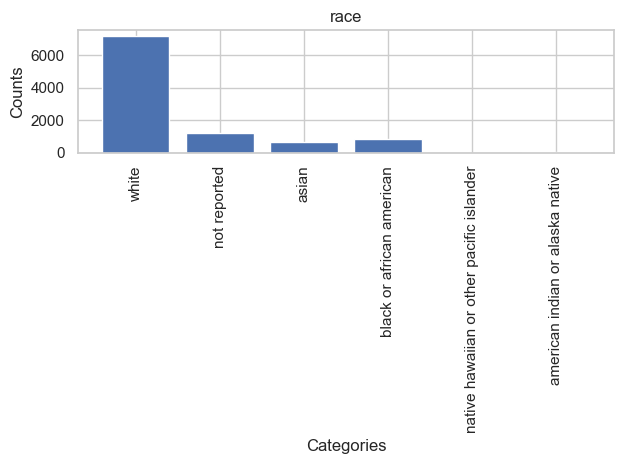

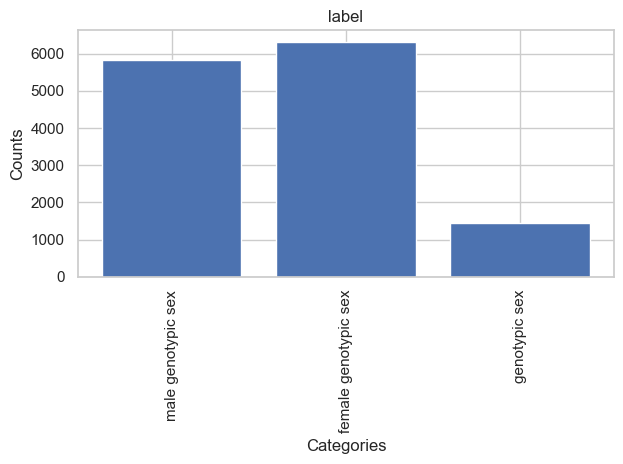

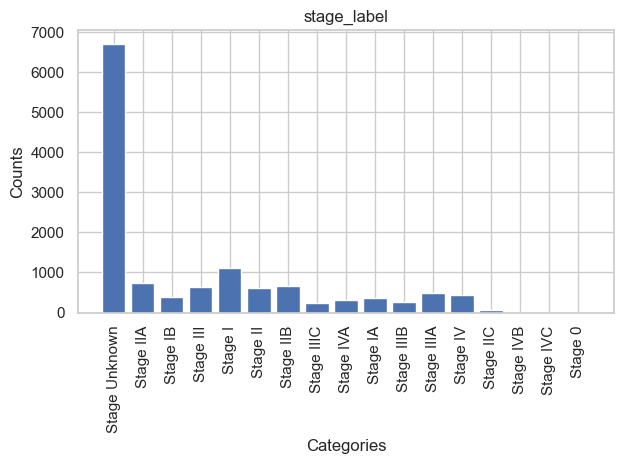

In [ ]:
# Function to create a bar chart

def create_chart(data_dict, chart_type, title):
    if chart_type == 'bar':
        plt.bar(data_dict.keys(), data_dict.values())
        plt.xticks(rotation=90)
    elif chart_type == 'pie':
        labels = list(data_dict.keys())
        values = list(data_dict.values())
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
    elif chart_type == 'histogram':
        ages = list(data_dict.keys())
        counts = list(data_dict.values())
        plt.hist(ages, bins=50, edgecolor='black')
    elif chart_type == 'boxplot':
        ages = list(data_dict.keys())
        plt.boxplot(ages)
    
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Create graphs for each variable in the 'counts' dictionary
for key in counts.keys():
    if key in ['death', 'race', 'label', 'stage_label']:
        create_chart(counts[key], 'bar', key)

# New analysis

In [ ]:
### Old prep ##############################################################################################################
# import pandas as pd

# wanted_columns = ['reference_name', 'start', 'end', 'reference_bases', 'alternate_bases', 'variant_classification',
#                   'snv_type', 'hugo_gene', 'center', 'ncbi_build', 'mutation_status', 'hgvsc', 'hgvsp', 'one_consequence',
#                   'consequence', 'biotype', 'canonical', 'sift', 'polyphen', 'clin_sig', 'mirna', 'impact',
#                   'variant_class', 'hotspot', 'biosample_status', 'collection_moment', 'histological_diagnosis',
#                   'icdo_morphology', 'icdo_topography', 'notes', 'sample_origin', 'updated',
#                   'disease_code_label', 'followup_state', 'followup_time_months', 'onset_age_days', 'stage',
#                   'age_at_diagnosis_days', 'days_to_death', 'race', 'year_of_birth', 'sex', 'clinical_significance',
#                   'cytoband', 'protein_change', 'diagnosis_Orphanet', 'diagnosis_MedGen', 'diagnosis_MONDO', 'diagnosis_OMIM',
#                   'diagnosis_Human Phenotype Ontology', 'diagnosis_MeSH', 'diagnosis_EFO', 'diagnosis_Gene', 'biosample_id',
#                   'individual_id', 'project', 'cnvfraction', 'clinvar_name']

# data = pd.read_csv('../data/complete_tcga.csv', usecols=wanted_columns)

# # set all keys to lower case
# data.columns = [x.lower() for x in data.columns]

# # rename columns
# data.rename(columns={'reference_name': 'chromosome', 'reference_bases': 'ref', 'alternate_bases': 'alt',
#                         'variant_classification_x': 'variant_classification', 'hugo_gene': 'gene', 'ncbi_build': 'build',
#                         'notes': 'tumor_type', 'disease_code_label': 'cancer_type', 'icdo_morphology': 'icdo_m',
#                         'icdo_topography': 'icdo_t'}, inplace=True)

# data.to_csv('../data/analysis_complete.csv', index=False)

In [22]:
import pandas as pd
import json
from pymongo import MongoClient
from bycon import *
import pprint
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Connect to MongoDB
client = MongoClient()
db = client['progenetix']
# Collections
variants_collection = db['variants']
biosamples_collection = db['biosamples']
genes_collection = db['genes']
individuals_collection = db['individuals']

In [19]:
# Pie chart for icdo-topo

# Get all the biosample ids from SNV variants
snv_biosamples = variants_collection.distinct('biosample_id', {'variant_state.label': 'sequence_alteration'})

# Build a dataframe with the columns: biosample_id, icdo_topography_id, icdo_topography_label
topo_df = pd.DataFrame(columns=['biosample_id', 'icdo_topography_id', 'icdo_topography_label'])

# Write the loop with pandas.concat since frame.append is deprecated
for topo in biosamples_collection.find({'id': {'$in': snv_biosamples}}, {'id': 1, 'icdo_topography': 1, '_id': 0}):
    if 'icdo_topography' in topo:
        topo_df = pd.concat([topo_df, pd.DataFrame([[topo['id'], topo['icdo_topography']['id'], topo['icdo_topography']['label']]], columns=['biosample_id', 'icdo_topography_id', 'icdo_topography_label'])])
    else:
        topo_df = pd.concat([topo_df, pd.DataFrame([[topo['id'], 'NA', 'NA']], columns=['biosample_id', 'icdo_topography_id', 'icdo_topography_label'])])

Breast, NOS                          11.6%
Bone marrow                           9.4%
Kidney, NOS                           9.2%
Brain, NOS                            4.8%
Upper lobe, lung                      4.1%
                                     ...  
Heart                                 0.0%
Spinal meninges                       0.0%
Aortic body and other paraganglia     0.0%
Upper gum                             0.0%
Pelvis, NOS                           0.0%
Name: icdo_topography_label, Length: 158, dtype: object

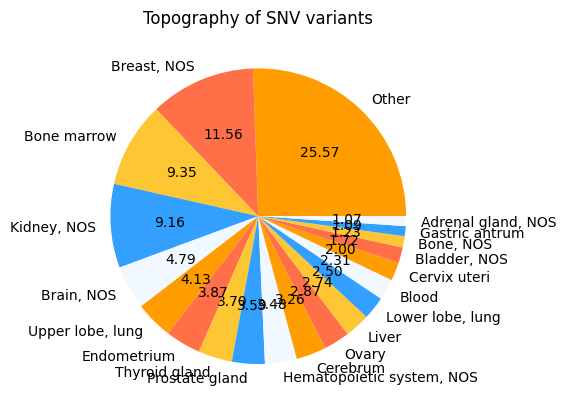

In [37]:
# Make pie chart with percentages and the topography labels
# Don't show labels that are under 1 % of the total

# Get the percentages
topo_perc = topo_df['icdo_topography_label'].value_counts(normalize=True) * 100
# Get the labels that are over 1 %
topo_labels = topo_perc[topo_perc > 1].index.tolist()
# Get the labels that are under 1 %
other_labels = topo_perc[topo_perc <= 1].index.tolist()
# Replace the labels that are under 1 % with 'Other'
topo_df['icdo_topography_label'].replace(other_labels, 'Other', inplace=True)

# Define a custom color scheme (replace these with your preferred colors)
custom_palette = sns.color_palette('colorblind', n_colors=20)

progenetix_colors = ["#FF9D00", "#FF6F48", "#FFC633", "#33A0FF", "#F1F8FF"]
extended_progenetix_colors = ["#FF9D00", "#FF8C14", "#FF7B28", "#FF6F48", "#FFC633", "#FFD04D", "#FFE366", "#33A0FF", "#8EB8E4", "#BDD4F2", "#F1F8FF"]


# Make the pie chart with the custom color scheme
topo_perc.plot(kind='pie', autopct='%.2f', labels=topo_labels, colors= progenetix_colors)
plt.title('Topography of SNV variants')
plt.ylabel('')
plt.show()